In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("sales_data_1.csv")
df.head()

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold
0,21/08/23,Vendor6,72.11,Customer7,91.58,44
1,21/08/23,Vendor4,75.08,Customer7,83.71,17
2,21/08/23,Vendor7,83.93,Customer2,103.76,15
3,21/08/23,Vendor7,52.01,Customer3,64.53,7
4,21/08/23,Vendor2,98.91,Customer5,140.92,1


## Q1 What is their overall gross margin for their business?

In [4]:
total_revenue = df["Selling price"].sum()
total_cost_of_goods_sold = df["Buying price"].sum()

gross_margin = (total_revenue - total_cost_of_goods_sold) / total_revenue

gross_margin_percentage = gross_margin * 100

print(f"Gross Margin: {gross_margin_percentage:.2f}%")


Gross Margin: 23.33%


## Q2. Which vendor is the most profitable?

In [6]:
df['Profit'] = (df['Selling price'] - df['Buying price']) * df['Quantity sold']
vendor_profit = df.groupby("Firm bought from")["Profit"].sum()

most_profitable_vendor = vendor_profit.idxmax()
total_profit = vendor_profit.max()

print(f"The most profitable vendor is {most_profitable_vendor}")


The most profitable vendor is Vendor4



## Q3. Which customer is the least profitable?

In [7]:
least_profitable_customer = df.groupby('Customer')['Profit'].sum().idxmin()
print(f"3. Least Profitable Customer: {least_profitable_customer}")

3. Least Profitable Customer: Customer3



## Q4. Which day of the week was most profitable for them?

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df["Day_of_Week"] = df["Date"].dt.day_name()
day_of_week_profit = df.groupby("Day_of_Week")["Profit"].sum()

most_profitable_day = day_of_week_profit.idxmax()

print(f"The most profitable day of the week is {most_profitable_day}")

The most profitable day of the week is Monday



## Q5. Which day of the week was the least profitable for them?

In [16]:
df["Day_of_Week"] = df["Date"].dt.day_name()
day_of_week_profit = df.groupby("Day_of_Week")["Profit"].sum()

least_profitable_day = day_of_week_profit.idxmin()
total_profit = day_of_week_profit.min()

print(f"The least profitable day of the week is {least_profitable_day}")

The least profitable day of the week is Sunday


In [44]:
df1=pd.read_csv("sales_data_2.csv")
df1['Profit'] = (df1['Selling price'] - df1['Buying price']) * df1['Quantity sold']

## Q6 Can you calculate a 3-day average of the daily gross profit from the sales_data_2.csv? 

In [45]:
df1["Date"] = pd.to_datetime(df1["Date"])
df1["Daily Gross Profit"] = (df1["Selling price"] - df["Buying price"]) * df["Quantity sold"]
df1["3-Day Average Profit"] = df1["Daily Gross Profit"].rolling(window=3).mean()

df1

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold,Profit,Daily Gross Profit,3-Day Average Profit
0,2023-08-21,Vendor6,72.11,60,Customer7,91.58,44,856.68,856.68,NaN
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17,146.71,146.71,NaN
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15,297.45,297.45,433.613333
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7,87.64,87.64,177.266667
4,2023-08-21,Vendor2,98.91,1,Customer5,140.92,1,42.01,42.01,142.366667
...,...,...,...,...,...,...,...,...,...,...
65,2023-08-27,Vendor4,64.82,28,Customer6,87.45,18,407.34,407.34,552.863333
66,2023-08-27,Vendor8,88.79,14,Customer3,105.59,5,84.00,84.00,552.070000
67,2023-08-27,Vendor5,63.30,81,Customer5,92.92,32,947.84,947.84,479.726667
68,2023-08-27,Vendor5,94.06,18,Customer5,125.67,4,126.44,126.44,386.093333


## Q7 Additionally, provide insights into how this 3-day trend changes over the time period covered in the dataset.

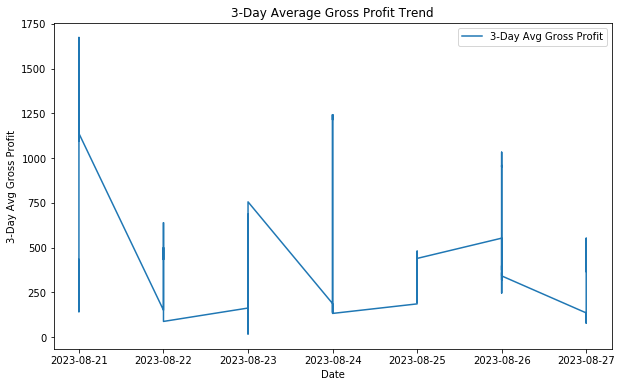

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(df1['Date'], df1['3-Day Average Profit'], label='3-Day Avg Gross Profit')
plt.xlabel('Date')
plt.ylabel('3-Day Avg Gross Profit')
plt.title('3-Day Average Gross Profit Trend')
plt.legend()
plt.show()

## Q8 Can you optimize the sales process to ensure gross margin is maximized?
    1. Would you fire any vendor?
    2. Would you let go of any customer?

## Q9 To ensure competitive pricing, Ram wants to benchmark their buying and selling prices against the market. Could you calculate the 25th, 50th (median), and 75th percentiles for both buying and selling prices? 

In [33]:
buying_prices = df1["Buying price"]
selling_prices = df1["Selling price"]

percentiles = [25, 50, 75]

buying_price_percentiles = np.percentile(buying_prices, percentiles)
selling_price_percentiles = np.percentile(selling_prices, percentiles)

for i, percentile in enumerate(percentiles):
    print(f"{percentile}th Percentile for Buying Price: {buying_price_percentiles[i]:.2f}")
    print(f"{percentile}th Percentile for Selling Price: {selling_price_percentiles[i]:.2f}")


25th Percentile for Buying Price: 29.90
25th Percentile for Selling Price: 38.98
50th Percentile for Buying Price: 60.76
50th Percentile for Selling Price: 78.99
75th Percentile for Buying Price: 78.32
75th Percentile for Selling Price: 103.40


## Q10 Additionally, analyze how often the Sapota’s prices fall below the 25th percentile or above the 75th percentile, potentially indicating they are buying at a high price or selling at a low price relative to their own transaction history.

In [34]:
below_25th_buying = (df1["Buying price"] < buying_price_percentiles[0]).sum()
above_75th_buying = (df1["Buying price"] > buying_price_percentiles[2]).sum()
below_25th_selling = (df1["Selling price"] < selling_price_percentiles[0]).sum()
above_75th_selling = (df1["Selling price"] > selling_price_percentiles[2]).sum()

total_rows = df.shape[0]

percentage_below_25th_buying = (below_25th_buying / total_rows) * 100
percentage_above_75th_buying = (above_75th_buying / total_rows) * 100
percentage_below_25th_selling = (below_25th_selling / total_rows) * 100
percentage_above_75th_selling = (above_75th_selling / total_rows) * 100

print(f"Percentage of buying prices below the 25th percentile: {percentage_below_25th_buying:.2f}%")
print(f"Percentage of buying prices above the 75th percentile: {percentage_above_75th_buying:.2f}%")
print(f"Percentage of selling prices below the 25th percentile: {percentage_below_25th_selling:.2f}%")
print(f"Percentage of selling prices above the 75th percentile: {percentage_above_75th_selling:.2f}%")


Percentage of buying prices below the 25th percentile: 25.71%
Percentage of buying prices above the 75th percentile: 25.71%
Percentage of selling prices below the 25th percentile: 25.71%
Percentage of selling prices above the 75th percentile: 25.71%


## Q11 Bharath says that Vendor 4 has to be honored.  What impact does it have on your optimal gross margin? 

## Q12 What’s the theoretical max margin the firm could have from that branch?

In [37]:
import pandas as pd

vendor_avg_margin = df1.groupby("Firm bought from").apply(lambda x: (x["Selling price"] - x["Buying price"]).mean())

best_vendor = vendor_avg_margin.idxmax()
max_avg_margin = vendor_avg_margin.max()

print(f"The vendor with the highest average gross margin is {best_vendor} with an average gross margin of {max_avg_margin:.2f}")

theoretical_max_margin = (df["Selling price"] - df["Buying price"]).mean()

print(f"The theoretical maximum gross margin for the branch is {theoretical_max_margin:.2f}")

The vendor with the highest average gross margin is Vendor9 with an average gross margin of 27.54
The theoretical maximum gross margin for the branch is 17.25


## Q13 Given this is the ground truth, what is the price elasticity of Sapota for that branch? (If you increase by Rs.1, how much sales will go up/down and if you decrease price by Rs. 1, how much sales will go up/down) 

In [36]:
import pandas as pd

average_quantity_sold = df1["Quantity sold"].mean()
average_selling_price = df1["Selling price"].mean()

new_price_increase = average_selling_price + 1
new_quantity_increase = df[df["Selling price"] == new_price_increase]["Quantity sold"].mean()
percentage_change_in_quantity_increase = ((new_quantity_increase - average_quantity_sold) / average_quantity_sold) * 100
percentage_change_in_price_increase = ((new_price_increase - average_selling_price) / average_selling_price) * 100

new_price_decrease = average_selling_price - 1
new_quantity_decrease = df[df["Selling price"] == new_price_decrease]["Quantity sold"].mean()
percentage_change_in_quantity_decrease = ((new_quantity_decrease - average_quantity_sold) / average_quantity_sold) * 100
percentage_change_in_price_decrease = ((new_price_decrease - average_selling_price) / average_selling_price) * 100

price_elasticity_increase = percentage_change_in_quantity_increase / percentage_change_in_price_increase
price_elasticity_decrease = percentage_change_in_quantity_decrease / percentage_change_in_price_decrease

print(f"Price Elasticity of Demand for a Rs. 1 price increase: {price_elasticity_increase:.2f}")
print(f"Price Elasticity of Demand for a Rs. 1 price decrease: {price_elasticity_decrease:.2f}")


Price Elasticity of Demand for a Rs. 1 price increase: nan
Price Elasticity of Demand for a Rs. 1 price decrease: nan
